In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("HousingData.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## Exploratory Data Analysis

In [4]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

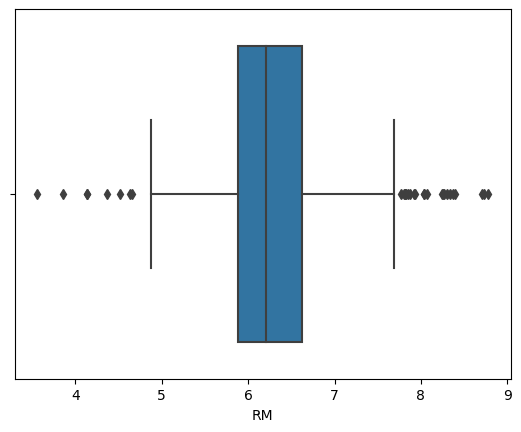

In [8]:
sns.boxplot(x=df['RM'])
plt.show()

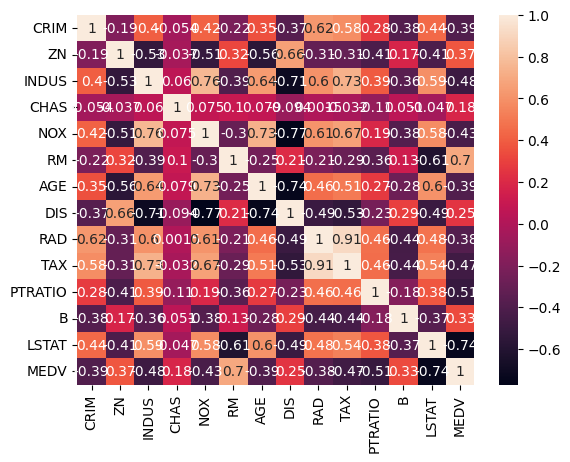

In [11]:
correlation_matrix = df.corr()
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

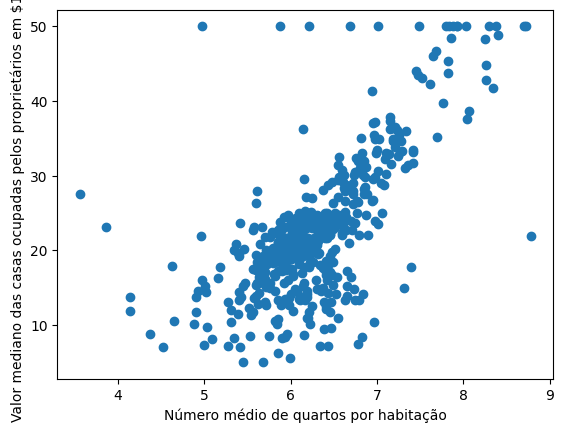

In [12]:
plt.scatter(df['RM'], df['MEDV'])
plt.xlabel('Número médio de quartos por habitação')
plt.ylabel('Valor mediano das casas ocupadas pelos proprietários em $1000')
plt.show()

## Preprocessing

In [20]:
# preenchendo valores ausentes com a mediana
for column in df.columns:
    df[column] = df[column].fillna(df[column].median())
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [23]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Selection

In [27]:
# Cria o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Treina o modelo
model.fit(X_train, y_train)

# Faz a previsão no conjunto de teste
y_pred = model.predict(X_test)

## Model Evaluate

In [32]:
# Calcula o Mean Absolute Error (MAE)
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

# Calcula o Root Mean Square Error (RMSE)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Square Error (RMSE):', rmse)

# Calcula o R^2 Score
r2 = metrics.r2_score(y_test, y_pred)
print('R^2 Score:', r2)

Mean Absolute Error (MAE): 2.358318181818184
Root Mean Square Error (RMSE): 3.3216390121855115
R^2 Score: 0.5575929000926214


## Model Tuning

In [35]:
# Define os parâmetros para a busca
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Cria o modelo de busca
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=2)

# Realiza a busca
grid_search.fit(X_train, y_train)

# Exibe os melhores parâmetros
print(grid_search.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 300}


In [36]:
# Cria o modelo com os melhores hiperparâmetros
best_model = RandomForestRegressor(n_estimators=300, max_depth=15, min_samples_split=2, random_state=42)

# Treina o modelo
best_model.fit(X_train, y_train)

# Faz a previsão no conjunto de teste
y_pred = best_model.predict(X_test)

# Avalia o modelo
mae = metrics.mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error (MAE):', mae)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Square Error (RMSE):', rmse)

r2 = metrics.r2_score(y_test, y_pred)
print('R^2 Score:', r2)

Mean Absolute Error (MAE): 2.3357495097495087
Root Mean Square Error (RMSE): 3.2657887012583675
R^2 Score: 0.5723451642611093
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END max_depth=None, min_samples_split=10, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=10, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_split=10, n_estimators=500; total time=   0.6s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=500; total time=   0.6s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=500; total time=   0.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   0.4s
[CV] END max_depth=10, min_samples_split=5, n_estimators=300; total time=   0.3s
[CV] END max_depth=10, min_samples_split=10, n_esti

[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=5, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, min_samples_split=10, n_estimators=300; total time=   0.4s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END .max_depth=5, min_samples_split=2, n_estimators=300; total time=   0.7s
[CV] END .max_depth=5, min_samples_split=5, n_estimators=500; total time=   0.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END max_depth=10, min_samples_split=5, n_estimators=500; total time=   0.5s
[CV] END max_dept